Indices of black box on overlay below:
xyz lower left corner  -211.11642335384613 -350.0720763769231 nan
xyz lower right corner 4234.252983476923 -350.0720763769231 nan
xyz upper left corner  -211.11642335384613 3800.749680638461 145.10477989455964
xyz upper right corner  4234.252983476923 3800.749680638461 nan


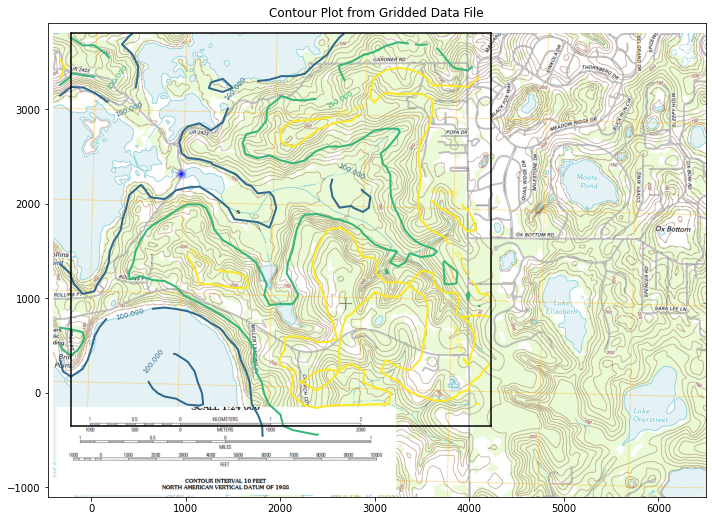

In [1]:
# CCMR from ENGR-1330:
# http://54.243.252.9/engr-1330-webroot/8-Labs/Lab07/Lab07.html
# https://clouds.eos.ubc.ca/~phil/docs/problem_solving/06-Plotting-with-Matplotlib/06.14-Contour-Plots.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/18730044/converting-two-lists-into-a-matrix
# https://stackoverflow.com/questions/3242382/interpolation-over-an-irregular-grid
# https://stackoverflow.com/questions/33919875/interpolate-irregular-3d-data-from-a-xyz-file-to-a-regular-grid
import pandas
my_xyz = pandas.read_csv('Florida-Training-Watershed-LevelSets.dat',sep='\t') # read an ascii file already prepared, delimiter is tabs
#my_xyz = pandas.read_csv('XYZSomewhereUSA.txt',sep=' ') # read an ascii file already prepared, delimiter is tabs
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) #examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz['X-Easting'].values.tolist()
coord_y = my_xyz['Y-Northing'].values.tolist()
coord_z = my_xyz['Z-Elevation'].values.tolist()
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 40)
lat = numpy.linspace(min(coord_y), max(coord_y), 40)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use cubic spline interpolation (other choices are nearest and linear)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic', fill_value = 'nan')
# Build the map
print("Indices of black box on overlay below:")
ixl = 2
ixh = 38
iyl = 2
iyh = 38
#print("x",X)
#print("y",Y)
#print("z",Z)
print("xyz lower left corner ",X[iyl][ixl],Y[iyl][ixl],Z[iyl][ixl])
print("xyz lower right corner",X[iyl][ixh],Y[iyl][ixh],Z[iyl][ixh])
print("xyz upper left corner ",X[iyh][ixl],Y[iyh][ixl],Z[iyh][ixl])
print("xyz upper right corner ",X[iyh][ixh],Y[iyh][ixh],Z[iyh][ixh])
xxl = X[iyl][ixl]
xxh = X[iyh][ixh]
yyl = Y[iyl][ixl]
yyh = Y[iyh][ixh]
flag=True
if flag:
    matplotlib.pyplot.rcParams["figure.figsize"] = [10.00, 8.00]
    matplotlib.pyplot.rcParams["figure.autolayout"] = True
    im = matplotlib.pyplot.imread("Florida-Training-Watershed.png") # base image
fig, ax = matplotlib.pyplot.subplots()
if flag: 
    im = ax.imshow(im, extent=[-400, 6500, -1100, 3800])# sets X and Y plot window of basemap
#fig.set_size_inches(14, 7)
levels=[50,100,150,200]
CS = ax.contour(X, Y, Z, levels, linewidths=2)
ax.clabel(CS, inline=2, fontsize=7)
ax.set_title('Contour Plot from Gridded Data File')
#ax.set_xlim([0,1000])
#ax.set_ylim([0,800])
ax.plot([xxl,xxh],[yyl,yyl],color="black")
ax.plot([xxl,xxh],[yyh,yyh],color="black")
ax.plot([xxl,xxl],[yyl,yyh],color="black")
ax.plot([xxh,xxh],[yyl,yyh],color="black");

In [2]:
Conductivity = 0.5 # feet/day
Porosity = 1.0 # voids/bulk
nrows = iyh - iyl
ncols = ixh - ixl
#Zero vectors for the velocity fields
U = [[0 for j in range(ncols)] for i in range(nrows)]
V = [[0 for j in range(ncols)] for i in range(nrows)]
#Zero vectors for realinged mesh grid
XG = [[0 for j in range(ncols)] for i in range(nrows)]
YG = [[0 for j in range(ncols)] for i in range(nrows)]
for j in range(ncols):
    for i in range(nrows): #range(nrows)
        U[i][j] = -1.0*(Conductivity/Porosity)*(Z[iyl+i][ixl+j]-Z[iyl+i][ixl+j-1])/(X[iyl+i][ixl+j]-X[iyl+i][ixl+j-1]) #- K dh/dx
        V[i][j] = -1.0*(Conductivity/Porosity)*(Z[iyl+i][ixl+j]-Z[iyl+i-1][ixl+j])/(Y[iyl+i][ixl+j]-Y[iyl+i-1][ixl+j]) #- K dh/dy
        XG[i][j] = X[iyl+i][ixl+j]
        YG[i][j] = Y[iyl+i][ixl+j]

In [3]:
# convert to numpy arrays
UU = numpy.asarray(U)
VV = numpy.asarray(V)
XX = numpy.asarray(XG)
YY = numpy.asarray(YG)

UU[30][30]

-0.010984096454629564

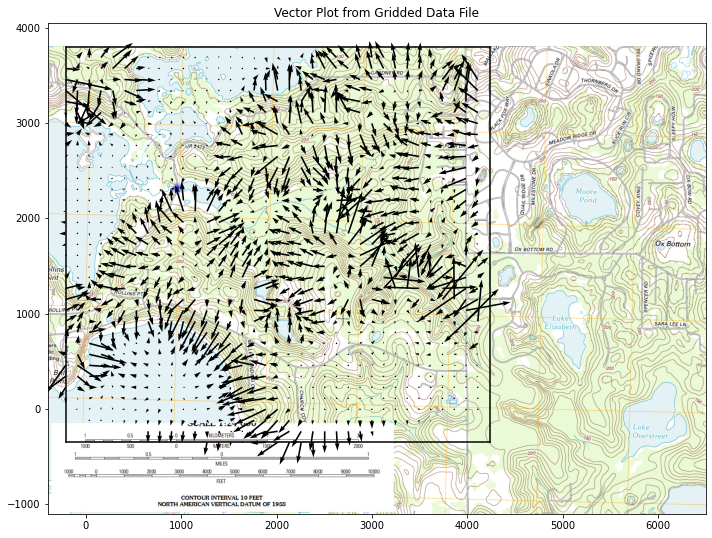

In [4]:
if flag:
    matplotlib.pyplot.rcParams["figure.figsize"] = [10.00, 8.00]
    matplotlib.pyplot.rcParams["figure.autolayout"] = True
    im = matplotlib.pyplot.imread("Florida-Training-Watershed.png") # base image
fig, ax = matplotlib.pyplot.subplots()
if flag: 
    im = ax.imshow(im, extent=[-400, 6500, -1100, 3800])# sets X and Y plot window of basemap
#fig.set_size_inches(14, 7)
levels=[50,100,150,200]
CS = ax.quiver(XX[::1, ::1], YY[::1, ::1], UU[::1, ::1], VV[::1, ::1], units='width')
#ax.clabel(CS, inline=2, fontsize=12)
ax.set_title('Vector Plot from Gridded Data File')
#ax.set_xlim([0,1000])
#ax.set_ylim([0,800]);
ax.plot([xxl,xxh],[yyl,yyl],color="black")
ax.plot([xxl,xxh],[yyh,yyh],color="black")
ax.plot([xxl,xxl],[yyl,yyh],color="black")
ax.plot([xxh,xxh],[yyl,yyh],color="black");

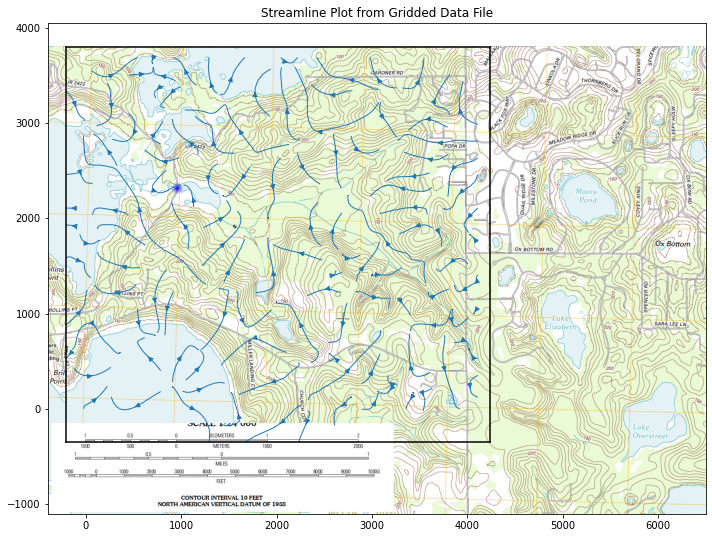

In [5]:
if flag:
    matplotlib.pyplot.rcParams["figure.figsize"] = [10.00, 8.00]
    matplotlib.pyplot.rcParams["figure.autolayout"] = True
    im = matplotlib.pyplot.imread("Florida-Training-Watershed.png") # base image
fig, ax = matplotlib.pyplot.subplots()
if flag: 
    im = ax.imshow(im, extent=[-400, 6500, -1100, 3800])# sets X and Y plot window of basemap
#fig.set_size_inches(14, 7)
levels=[50,100,150,200]
CS = ax.streamplot(XX, YY, UU, VV,  density=0.8, linewidth=1, color=None, arrowsize=1)
#ax.clabel(CS, inline=2, fontsize=12)
ax.set_title('Streamline Plot from Gridded Data File')
#ax.set_xlim([0,1000])
#ax.set_ylim([0,800]);
ax.plot([xxl,xxh],[yyl,yyl],color="black")
ax.plot([xxl,xxh],[yyh,yyh],color="black")
ax.plot([xxl,xxl],[yyl,yyh],color="black")
ax.plot([xxh,xxh],[yyl,yyh],color="black");

In [6]:
# U array x-velocity at XG,YG
# V array y-velocity at XG,YG
# XG array X-value of cell center
# YG array Y-value of cell center
# XP X-value of particle position 
# YP Y-value of particle position
# UP x-velocity of particle 
# VP y-velocity of particle
# TX x-component particle trajectory
# TY y-component particle trajectory

import math
verbose=False
terse=False
deltaT = 2000
etime = 0
numTime = 500
XP = []
YP = []
UP = []
VP = []
TX = [] #trajectory vector
TY = []
np = 1 # Total particles 
XP.append(1500)
YP.append(1500)
UP.append(0)
VP.append(0)
ip=np-1 
print("                   Initial Particle Position",round(XP[ip],2),round(YP[ip],2),round(UP[ip],2),round(VP[ip],2),round(etime,2))

# move particles this time step
for it in range(numTime):
    for ip in range(np):
    # Build Particle Distance Table
        dist = []
        index = []
        count = 0
        for j in range(ncols):
            for i in range(nrows): #range(nrows)
                dist.append(math.sqrt((XX[i][j]-XP[ip])**2 + (YY[i][j]-YP[ip])**2))
                index.append([count,i,j]) # use to find i,j for a given index
                count = count +1
    # find closest cell
        for i in range(count):
            if dist[i] <= min(dist):
                #print(index[i],dist[i])
                ixx=index[i][1]
                jyy=index[i][2]
    # use nearest cell assignment - aka simple scheme
                UP[ip] = UU[ixx][jyy]
                VP[ip] = VV[ixx][jyy]
                if verbose: print("Particle Position and Velocities Before Move",round(XP[ip],2),round(YP[ip],2),round(UP[ip],2),round(VP[ip],2),round(etime,2))
                break #exits the loop - we stop at the first nearest cell encountered
    # move the particle
        XP[ip]=XP[ip]+UP[ip]*deltaT
        YP[ip]=YP[ip]+VP[ip]*deltaT
        etime=etime+deltaT
        if terse: print(" Particle Position and Velocities After Move",round(XP[ip],2),round(YP[ip],2),round(UP[ip],2),round(VP[ip],2),round(etime,2))
        TX.append([ip,XP[ip],etime])
        TY.append([ip,YP[ip],etime])

                   Initial Particle Position 1500 1500 0 0 0


''

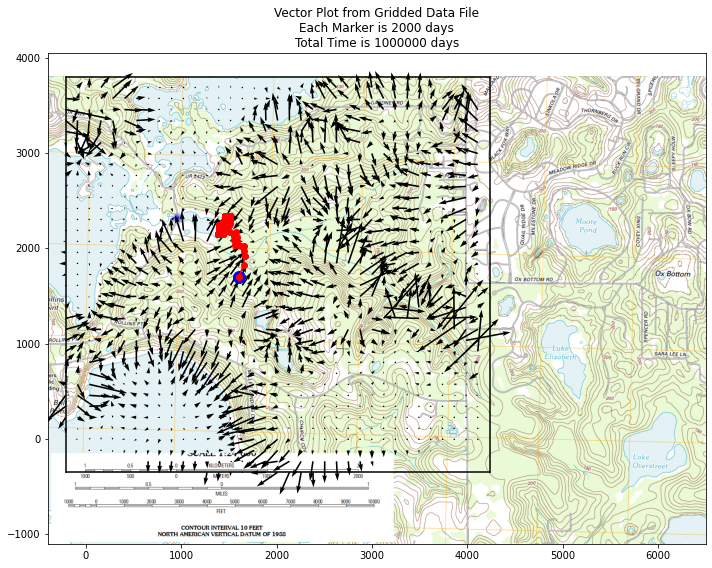

In [7]:
if flag:
    matplotlib.pyplot.rcParams["figure.figsize"] = [10.00, 8.00]
    matplotlib.pyplot.rcParams["figure.autolayout"] = True
    im = matplotlib.pyplot.imread("Florida-Training-Watershed.png") # base image
fig, ax = matplotlib.pyplot.subplots()
if flag: 
    im = ax.imshow(im, extent=[-400, 6500, -1100, 3800])# sets X and Y plot window of basemap
#fig.set_size_inches(14, 7)
levels=[50,100,150,200]
CS = ax.quiver(XX[::1, ::1], YY[::1, ::1], UU[::1, ::1], VV[::1, ::1], units='width')
#ax.clabel(CS, inline=2, fontsize=12)
ax.set_title('Vector Plot from Gridded Data File\n' +\
            'Each Marker is ' + str(deltaT) + ' days\n' +\
            'Total Time is ' + str(etime) + ' days')
#ax.set_xlim([0,1000])
#ax.set_ylim([0,800]);
ax.plot([xxl,xxh],[yyl,yyl],color="black")
ax.plot([xxl,xxh],[yyh,yyh],color="black")
ax.plot([xxl,xxl],[yyl,yyh],color="black")
ax.plot([xxh,xxh],[yyl,yyh],color="black")
xtrajectory = [sublist[1] for sublist in TX]
ytrajectory = [sublist[1] for sublist in TY]
ax.plot(xtrajectory[0],ytrajectory[0],marker="o",color="blue",markersize=12)
ax.plot(xtrajectory,ytrajectory,marker="o",color="red")
;